# Overview

Through this notebook we tried to explore how COVID-19 is affecting people of various ages, to predict the number of deaths and to determine the effect of GDP on pandemic response and vice versa. This pandemic has hugely disrupted world economies and gleaning meaningful insights by applying the data science strategies that we have learnt so far on relevant data can help us learn about any changing trends or outlier observations and be more prepared in these challenging times.

## Data Pre-processing

#### Loading required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
import seaborn as sns
import datetime as dt
import random
import scipy.stats as stats
%matplotlib inline 
sns.set()
from pandas.api.types import CategoricalDtype

In [2]:
pd.set_option('display.max_rows', 500)

pd.set_option('display.max_columns', 500)

In [3]:
!pip install pandas plotnine
from plotnine import *

## Reading Data

In [4]:
df = pd.read_csv("data/owid-covid-data.csv")

## Understanding structure of data

#### Looking at top 10 rows of data

In [5]:
df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
5,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
6,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
7,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
8,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
9,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [6]:
df.tail(10)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
33407,NaN,NaN,International,2020-02-23,634.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33408,NaN,NaN,International,2020-02-24,691.0,57.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33409,NaN,NaN,International,2020-02-25,691.0,0.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33410,NaN,NaN,International,2020-02-26,691.0,0.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33411,NaN,NaN,International,2020-02-27,705.0,14.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33412,NaN,NaN,International,2020-02-28,705.0,0.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33413,NaN,NaN,International,2020-02-29,705.0,0.0,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33414,NaN,NaN,International,2020-03-01,705.0,0.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33415,NaN,NaN,International,2020-03-02,705.0,0.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33416,NaN,NaN,International,2020-03-10,696.0,-9.0,7.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Takeaways

Looking at the last 10 rows in the dataset shows we have few rows which are tagged as "International" and do not tie to anyone
continent.

In [7]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

#### Looking at all the variables and their types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33417 entries, 0 to 33416
Data columns (total 34 columns):
iso_code                           33353 non-null object
continent                          33141 non-null object
location                           33417 non-null object
date                               33417 non-null object
total_cases                        33062 non-null float64
new_cases                          33062 non-null float64
total_deaths                       33062 non-null float64
new_deaths                         33062 non-null float64
total_cases_per_million            32998 non-null float64
new_cases_per_million              32998 non-null float64
total_deaths_per_million           32998 non-null float64
new_deaths_per_million             32998 non-null float64
new_tests                          10401 non-null float64
total_tests                        10647 non-null float64
total_tests_per_thousand           10647 non-null float64
new_tests_per_thousand   

##### Takeaways: 
There are 33417 observations and 34 columns where 5 variables are of categorical data type and the remaining 29 variables are of numerical data types. 

Looking at the column names, the dataset provides us information about total number of COVID cases, tests and deaths by continent and by different age brackets. It also has information about per capitia, life expectancy, death rate by cardiovsacular and diabetes on a daily basis.

#### Converting data types

The date field is in string type which needs to be converted to date type

In [9]:
df['date']= pd.to_datetime(df['date'])
df['date'] = df['date'].map(dt.datetime.toordinal)

#### Describing and Summarizing numerical or continuous variables

In [10]:
df.describe()

,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
count,33417.000000,3.306200e+04,33062.000000,33062.000000,33062.00000,32998.000000,32998.000000,32998.000000,32998.000000,10401.000000,1.064700e+04,10647.000000,10401.000000,11520.000000,11520.000000,27130.000000,3.335300e+04,31910.000000,30074.000000,29638.000000,29919.000000,29708.000000,19865.000000,30083.000000,31104.000000,23877.000000,23591.000000,13764.000000,27353.000000,32951.000000
mean,737551.449741,5.091939e+04,1010.762809,2655.291634,39.93243,1103.657007,17.858746,40.909829,0.533204,16320.258341,7.689958e+05,30.980448,0.572316,15589.503906,0.551412,58.327987,9.443562e+07,368.561392,31.634754,9.450372,5.990319,21546.066343,11.489011,249.517591,8.039533,10.990606,32.629508,53.246010,3.146980,74.244388
std,53.610095,5.180225e+05,9309.139517,25233.329557,347.73264,2674.940362,62.928423,123.250689,3.006846,59168.420750,3.022411e+06,55.964699,1.104416,54168.666654,0.979232,29.773501,6.370159e+08,1680.063490,9.012636,6.375376,4.362110,20697.420278,18.736936,117.957827,4.116805,10.504692,13.328649,31.456423,2.549325,7.316460
min,737424.000000,0.000000e+00,-29726.000000,0.000000,-1918.00000,0.000000,-437.881000,0.000000,-41.023000,-3743.000000,1.000000e+00,0.000000,-0.398000,0.000000,0.000000,0.000000,8.090000e+02,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000
25%,737515.000000,2.100000e+01,0.000000,0.000000,0.00000,8.521500,0.000000,0.000000,0.000000,805.000000,2.585100e+04,1.437000,0.049000,903.000000,0.051000,37.960000,1.701583e+06,39.497000,24.400000,3.607000,2.162000,6171.884000,0.500000,153.493000,5.310000,1.900000,21.400000,22.863000,1.380000,70.390000
50%,737556.000000,4.460000e+02,5.000000,9.000000,0.00000,155.458000,0.773000,2.043000,0.000000,2766.000000,1.105140e+05,8.105000,0.221000,3115.000000,0.239000,67.590000,8.655541e+06,90.672000,31.800000,7.104000,4.458000,15183.616000,1.700000,235.954000,7.110000,6.434000,31.400000,55.182000,2.540000,75.860000
75%,737596.000000,5.066500e+03,102.000000,107.000000,2.00000,936.628000,10.572000,21.692000,0.140000,9307.000000,4.324700e+05,38.056000,0.693000,9528.250000,0.691000,81.940000,3.236600e+07,222.873000,39.800000,14.864000,9.720000,33132.320000,15.000000,318.949000,10.080000,19.600000,40.900000,83.741000,4.210000,80.100000
max,737635.000000,1.670892e+07,284710.000000,660123.000000,10512.00000,38138.741000,4944.376000,1237.551000,200.040000,929838.000000,5.063568e+07,638.167000,20.611000,801014.000000,15.456000,100.000000,7.794799e+09,19347.500000,48.200000,27.049000,18.493000,116935.600000,77.600000,724.417000,23.360000,44.000000,78.100000,98.999000,13.800000,86.750000


#### Takeaways: 
There are some negative numbers as seen in the above output. For example, new_cases column has a min value of -29726. 
As this is the number of test cases so we cannot have negative values. Looks like a data error. Similarly, we have 
other such columns which are negatives - new_deaths, new_cases_per_million, new_deaths_per_million, new_tests
and new_tests_per_thousand.

### Feature Selection
#### Dropping unnecessary and redundant numerical columns before analyzing data

In [11]:
df.isna().sum()

iso_code                              64
continent                            276
location                               0
date                                   0
total_cases                          355
new_cases                            355
total_deaths                         355
new_deaths                           355
total_cases_per_million              419
new_cases_per_million                419
total_deaths_per_million             419
new_deaths_per_million               419
new_tests                          23016
total_tests                        22770
total_tests_per_thousand           22770
new_tests_per_thousand             23016
new_tests_smoothed                 21897
new_tests_smoothed_per_thousand    21897
tests_units                        21129
stringency_index                    6287
population                            64
population_density                  1507
median_age                          3343
aged_65_older                       3779
aged_70_older   

There are a total number of 33417 observations and the following variables have more than 60% of data as missing values. 

new_tests, total_tests, total_tests_per_thousand, new_tests_per_thousand, new_tests_smoothed, new_tests_smoothed_per_thousand, tests_units, 

and the variable "handwashing_facilities"  has 19653 close to 60% of data as missing values.

Therefore, these variables should be removed in order to avoid any bias in modeling. The variable extreme_poverty is also having 40% of its values as missing values. However, we will try to consider this variable as it has less than 50% of its missing values. 


In [12]:
df.drop(['new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units', 'handwashing_facilities'], axis = 1, inplace = True)

The below mentioned variables should also be removed as these are conversions per million. We would prefer to use per million numbers in general compared to just numbers, however, there are more missing values in variables using per million as conversions. Therefore, we stick to the original variables.

total_cases_per_million, new_cases_per_million, total_deaths_per_million, and new_deaths_per_million

In [13]:
df.drop(['total_cases_per_million', 'new_cases_per_million', 'total_deaths_per_million', 'new_deaths_per_million'], axis = 1, inplace = True)

Because Population Density is calculated using Population, we need to remove Population

In [14]:
df.drop(['population'], axis = 1, inplace = True)

#### Describing and Summarizing categorical variables

In [15]:
df.describe(include = 'O')

,iso_code,continent,location
count,33353,33141,33417
unique,211,6,212
top,BLR,Europe,Austria
freq,212,9113,212


In [16]:
df["continent"].head()

0    Asia
1    Asia
2    Asia
3    Asia
4    Asia
Name: continent, dtype: object

In [17]:
df["continent"].tail()

33412    NaN
33413    NaN
33414    NaN
33415    NaN
33416    NaN
Name: continent, dtype: object

In [18]:
df["location"].tail()

33412    International
33413    International
33414    International
33415    International
33416    International
Name: location, dtype: object

In [19]:
df["iso_code"].tail()

33412    NaN
33413    NaN
33414    NaN
33415    NaN
33416    NaN
Name: iso_code, dtype: object

#### Takeaways - Drop specific rows

Looking at the categorical variables. Some of the rows for iso_code has no values and corresponding continent also doesn't have any values. Also, the corresponding location has only "International" as the values. This means there is no way to track which location in these rows belongs to which continent and such. Therefore, we should remove these rows. There are only 64 such rows with no values in iso_code variables. Therefore, removing such a small data will not affect our model. 

In [20]:
df = df.dropna(how='all', subset=['iso_code'])

#### Looking at shape of new dataset 

We now have 33353 observations instead of 33417 observations and 21 variables instead of 34 variables.

In [21]:
df.shape

(33353, 21)

All the names of variables in our current data set are listed below

In [22]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'stringency_index', 'population_density',
       'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita',
       'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence',
       'female_smokers', 'male_smokers', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

Lets do a describe on the reduced set 

In [23]:
df.describe()

,date,total_cases,new_cases,total_deaths,new_deaths,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
count,33353.000000,3.299800e+04,32998.000000,32998.000000,32998.000000,27130.000000,31910.000000,30074.000000,29638.000000,29919.000000,29708.000000,19865.000000,30083.000000,31104.000000,23877.000000,23591.000000,27353.000000,32951.000000
mean,737551.633646,5.101779e+04,1012.702103,2660.440057,40.009667,58.327987,368.561392,31.634754,9.450372,5.990319,21546.066343,11.489011,249.517591,8.039533,10.990606,32.629508,3.146980,74.244388
std,53.490448,5.185198e+05,9318.058677,25257.517537,348.065275,29.773501,1680.063490,9.012636,6.375376,4.362110,20697.420278,18.736936,117.957827,4.116805,10.504692,13.328649,2.549325,7.316460
min,737424.000000,0.000000e+00,-29726.000000,0.000000,-1918.000000,0.000000,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,0.100000,53.280000
25%,737516.000000,2.100000e+01,0.000000,0.000000,0.000000,37.960000,39.497000,24.400000,3.607000,2.162000,6171.884000,0.500000,153.493000,5.310000,1.900000,21.400000,1.380000,70.390000
50%,737556.000000,4.470000e+02,5.000000,9.000000,0.000000,67.590000,90.672000,31.800000,7.104000,4.458000,15183.616000,1.700000,235.954000,7.110000,6.434000,31.400000,2.540000,75.860000
75%,737596.000000,5.105500e+03,102.000000,108.000000,2.000000,81.940000,222.873000,39.800000,14.864000,9.720000,33132.320000,15.000000,318.949000,10.080000,19.600000,40.900000,4.210000,80.100000
max,737635.000000,1.670892e+07,284710.000000,660123.000000,10512.000000,100.000000,19347.500000,48.200000,27.049000,18.493000,116935.600000,77.600000,724.417000,23.360000,44.000000,78.100000,13.800000,86.750000


##### Takeaways
We did get rid of some of the columns which had negatives however we are still left with negative values in new_cases and 
new_deaths. Lets replace them with 0 for now since we do not know the exact metrics and in order to not introduce noise, we will replace the negatives with zeroes.

In [24]:
#Replacing any negatives with zeros
df.loc[df['new_cases'] < 0, 'new_cases'] = 0
df.loc[df['new_deaths'] < 0, 'new_deaths'] = 0

## Graphical Exploratory Analysis

Before we go deeper into the dataset, it is good to perform some graphical exploratory analysis as we can quickly see and find issues with the data

In [25]:
df.groupby('continent').size()

continent
Africa           7479
Asia             8274
Europe           9113
North America    5047
Oceania          1253
South America    1975
dtype: int64

<AxesSubplot:xlabel='continent', ylabel='count'>

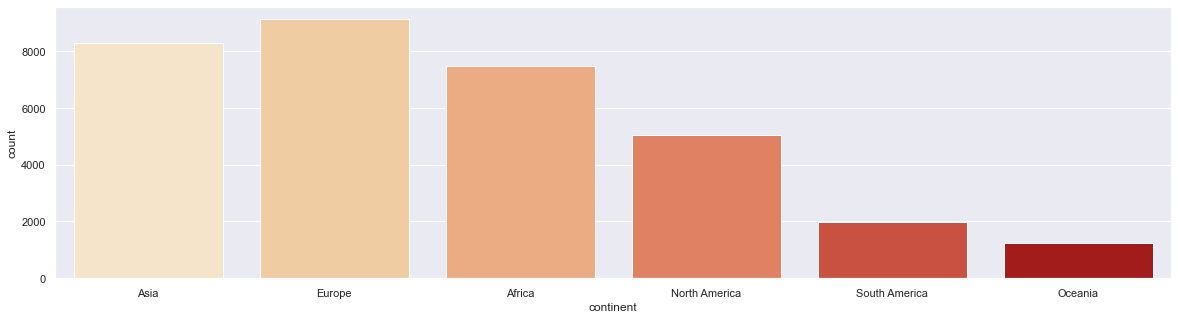

In [26]:
plt.figure(figsize=(20,5))
sns.countplot(x='continent',data=df, palette="OrRd")

The above graph shows that Europe has majority of the cases

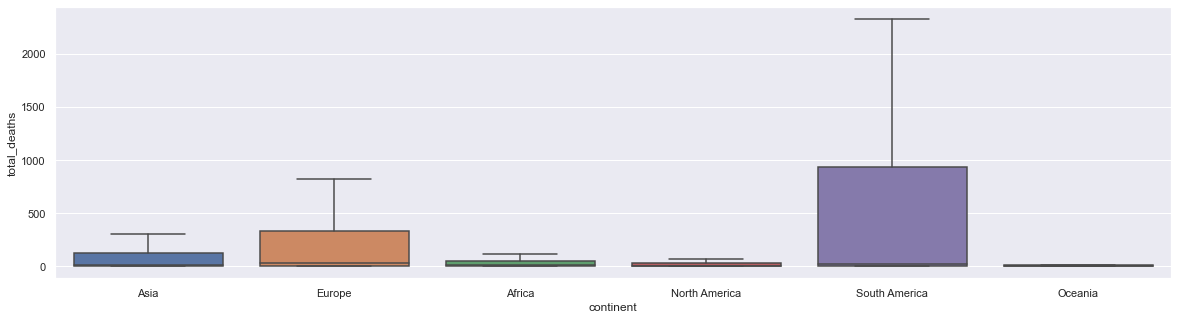

In [27]:
plt.figure(figsize=(20,5))
ax = sns.boxplot(x="continent", y="total_deaths", data=df, showfliers=False)

Based on the above boxplots, the number of deaths are highest in Europe followed by South America, Africa, Asia, North America, and Oceans.

#### Let's explore the population density in these continents

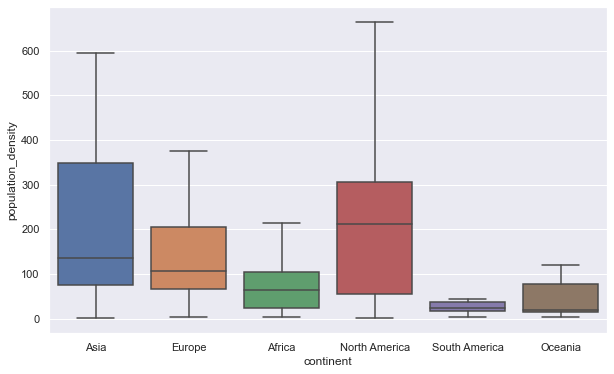

In [28]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x="continent", y="population_density", data=df, showfliers=False)

#### Takeaways
The above chart shows that the population density is highest in North America followed by Asia, Europe, Africa, Oceana, and last South America. Therefore, even though Europe seem to have highest number of deaths and North America among the least number of deaths, it is important to consider that North America has higher population density compared to Europe.  

Therefore, by comparing the above two plots, it is surprising that South America has the more number of deaths among all as it has the lesser population density. There can be several factors affecting the death rate. But this is probably because people in South America are not taking as good of a precaution as some other continents.Also, it is important to note that North America has high population density and surprisngly, North America has one of the least number of deaths. This means that more precautions and other methods are in place at North America when compared to Europe to beat the COVID-19 situation.

#### Let's explore the number of cases by continent

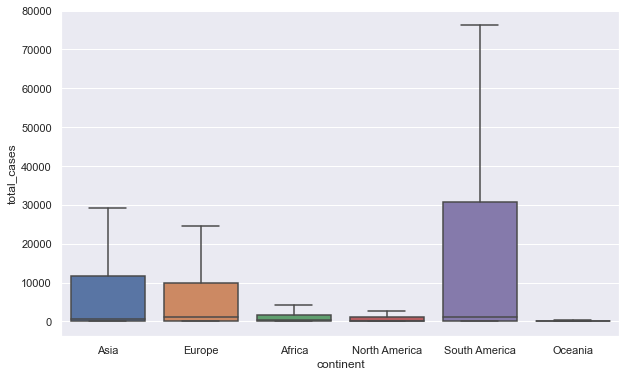

In [29]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x="continent", y="total_cases", data=df, showfliers=False)

Clearly, Europe and South America have the highest number of cases and so has highest number of deaths

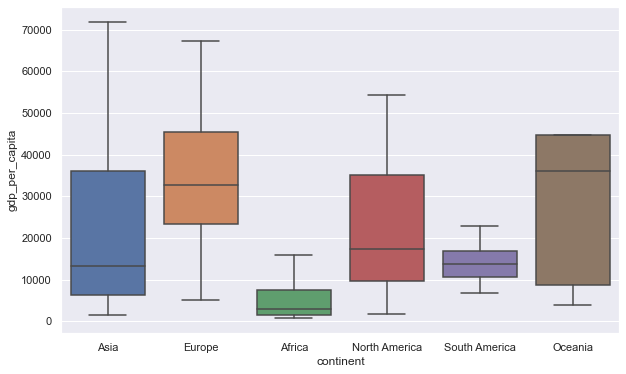

In [30]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x="continent", y="gdp_per_capita", data=df, showfliers=False)

#### Takeaways
Europe and Oceana are richest continents of all. Oceana has least population density and that's why less number of cases leading to lesser number of deaths. However, Europe on the other hand, is among the richest continents, ranks number third in population density and total number of cases, and still has the highest number of total deaths. So, it will be interesting to study Europe among all the continents and help them predict total number of deaths ahead of time. This will help Europe in managing the situation better to some extent. 

### Studying Europe

In [31]:
df = df[df['continent'] == "Europe"]
df = df.drop("continent", axis=1)

df.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
202,ALB,Albania,737493,2.0,2.0,0.0,0.0,36.11,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57
203,ALB,Albania,737494,6.0,4.0,0.0,0.0,41.67,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57
204,ALB,Albania,737495,10.0,4.0,0.0,0.0,51.85,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57
205,ALB,Albania,737496,11.0,1.0,1.0,1.0,51.85,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57
206,ALB,Albania,737497,23.0,12.0,1.0,0.0,78.70,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,2.89,78.57


In [32]:
df.groupby('location').size()

location
Albania                   143
Andorra                   138
Austria                   212
Belarus                   212
Belgium                   212
Bosnia and Herzegovina    139
Bulgaria                  142
Croatia                   212
Cyprus                    140
Czech Republic            212
Denmark                   212
Estonia                   212
Faeroe Islands            146
Finland                   212
France                    212
Germany                   212
Gibraltar                 132
Greece                    212
Guernsey                  132
Hungary                   148
Iceland                   212
Ireland                   210
Isle of Man               131
Italy                     212
Jersey                    132
Kosovo                    138
Latvia                    152
Liechtenstein             141
Lithuania                 212
Luxembourg                205
Macedonia                 203
Malta                     175
Moldova                   142
M

In [33]:
#df_sample = pd.DataFrame({'count' : df.groupby( [ "location"] ).size()}).reset_index()

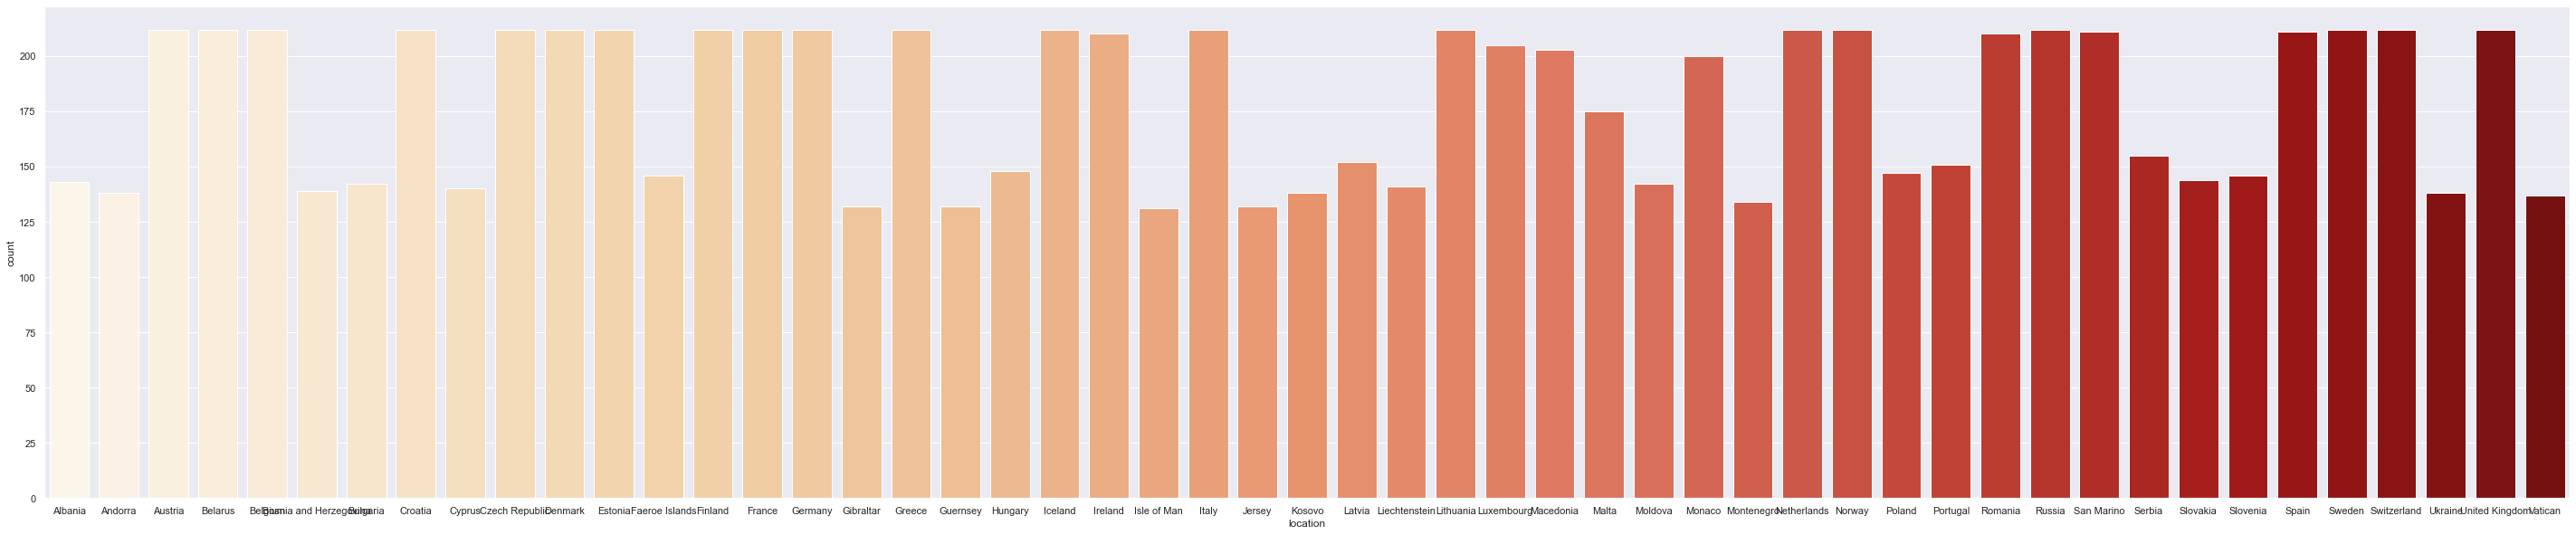

In [34]:
plt.figure(figsize=(50,10))
ax = sns.countplot(x ='location',data=df, palette="OrRd")

#### Takeaways
The count by location is not consistent across all locations since all bars are not of the same height. This can give some 
biased results for locations that have a higher representation.

### Looking at data distribution by per capitia 

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\layer.py:369: PlotnineWarning: stat_bin : Removed 1289 rows containing non-finite values.


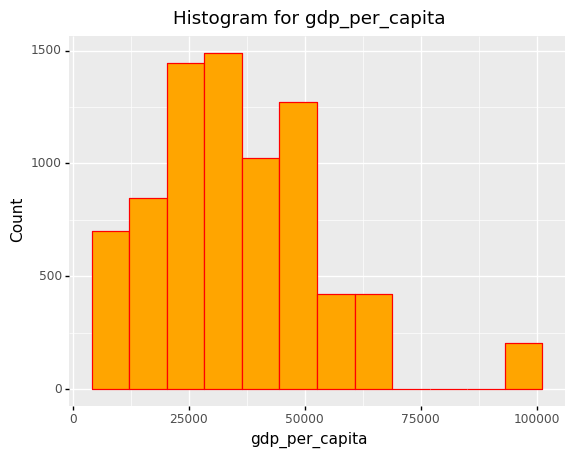

<ggplot: (128102346707)>

In [35]:
(ggplot(df, aes(x='gdp_per_capita'))   
 + geom_histogram(bins=12,
                 color ="red", 
                 fill ="orange")
 + labs(title="Histogram for gdp_per_capita", x="gdp_per_capita", y="Count")
)

##### Takeaways
We do not have a normalized distribution of locations based on gdp per capitia. This can be a good data point while considering any action based on location to consider per capitia skewness into account.

#### Median_Age

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\layer.py:369: PlotnineWarning: stat_bin : Removed 1638 rows containing non-finite values.


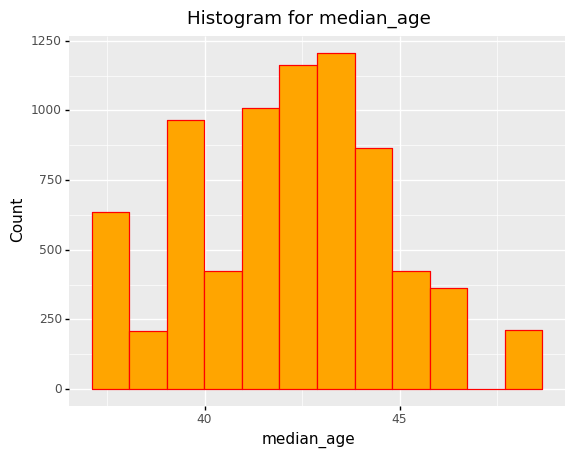

<ggplot: (-9223371908752308280)>

In [36]:
(ggplot(df, aes(x='median_age'))   
 + geom_histogram(bins=12,
                 color ="red", 
                 fill ="orange")
 + labs(title="Histogram for median_age", x="median_age", y="Count")
)

#### Takeaways
The age distribution indicates that the data is almost normalized. We have some peaks around 40 years and some around 0. Most likely the instances contributing to age bracket around 0 are due to missing data points.

Text(0.5, 1.0, 'Total Number of Cases vs Total Deaths')

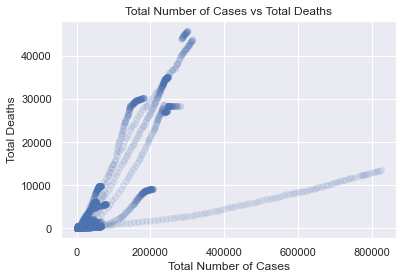

In [37]:
plt.scatter(df['total_cases'], df['total_deaths'], alpha = 0.1)
plt.xlabel("Total Number of Cases")
plt.ylabel("Total Deaths")
plt.title("Total Number of Cases vs Total Deaths")

#### Takeaways:
The scatter chart above shows an upwward rising trend. As the number of cases are rising we alse see an
increase in number of deaths. The scatters are sometimes cut off indicating we dont have the metrics for total cases 
and total deaths for all locations consistently. The number of cases by location can vary drastically across locations 
depending on the severity of the outbreak by region. The abrupt pattern in the above graph indicates the same.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.sta

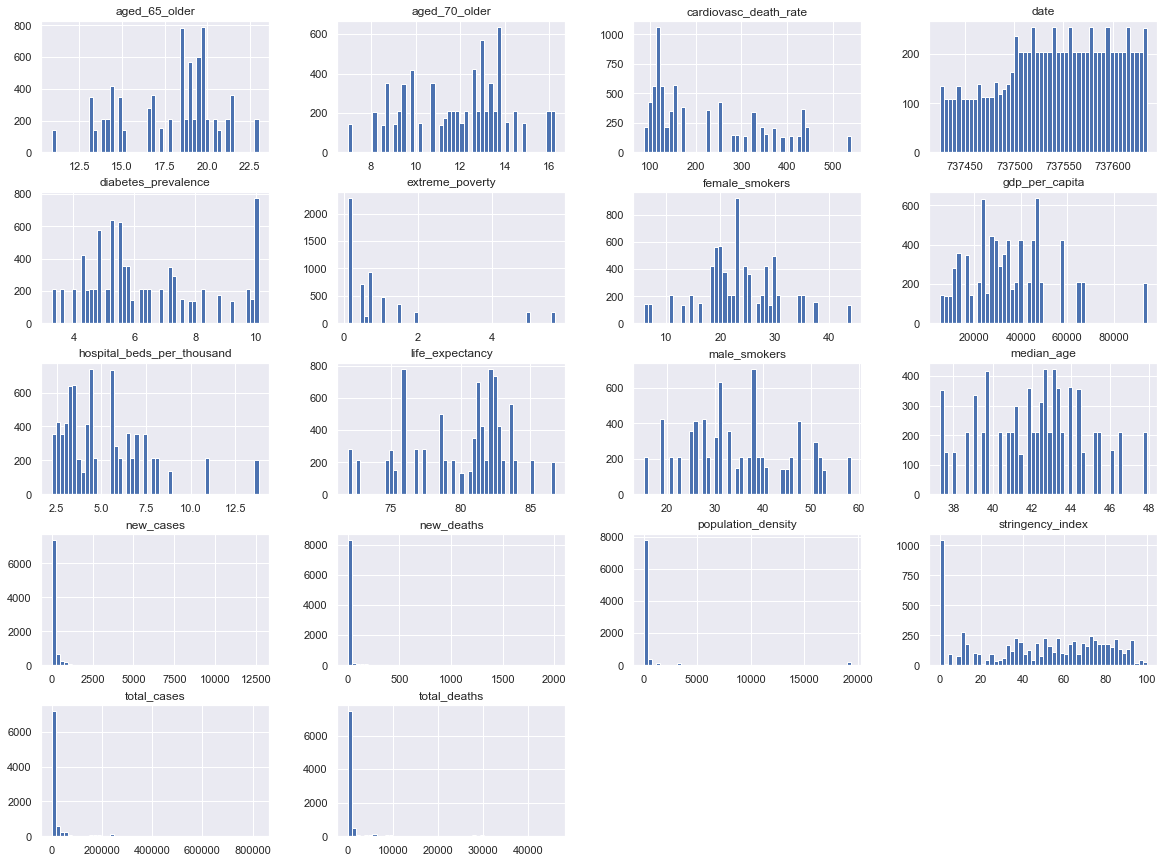

In [38]:
df.hist(bins = 50, figsize = (20,15))
plt.show()

#### Takeaways
Out of the above graphs, we look at the hospital beds per thousand, the graph is left skewed indicating that majority of the hospitals have few beds. In times of a resource crunch, fewer beds and more cases can be a stress on the hospitals and might lead to compromise in health care services offered to patients not just seeking COVID treatment but any other conditions as well.

### Get Dummy Variables

In [39]:
df = pd.get_dummies(df, columns = ['iso_code', 'location'], drop_first = True)

## Handling Missing Values

As seen from above df.isnull().sum(), there are several missing values in this dataset. Therefore, we first need to handle these missing values before proceeding further. We will use SimpleImputer for this.

In [40]:
df.isnull().sum()

date                                  0
total_cases                          86
new_cases                            86
total_deaths                         86
new_deaths                           86
stringency_index                   1906
population_density                  401
median_age                         1638
aged_65_older                      1638
aged_70_older                      1793
gdp_per_capita                     1289
extreme_poverty                    3572
cardiovasc_death_rate              1500
diabetes_prevalence                 948
female_smokers                     1703
male_smokers                       1703
hospital_beds_per_thousand         1086
life_expectancy                     402
iso_code_AND                          0
iso_code_AUT                          0
iso_code_BEL                          0
iso_code_BGR                          0
iso_code_BIH                          0
iso_code_BLR                          0
iso_code_CHE                          0


In [41]:
# Impute missing values using Imputer in sklearn.preprocessing
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(df)
df = pd.DataFrame(data=imputer.transform(df) , columns=df.columns)

## Training - Testing Model

In [42]:
# Assign X as a DataFrame of features and y as a Series of the outcome variable
X = df.drop('total_deaths', 1)
y = df.total_deaths

In [43]:
X.isnull().sum().sort_values(ascending=False)

location_Vatican                   0
iso_code_ITA                       0
iso_code_FIN                       0
iso_code_FRA                       0
iso_code_FRO                       0
iso_code_GBR                       0
iso_code_GGY                       0
iso_code_GIB                       0
iso_code_GRC                       0
iso_code_HRV                       0
iso_code_HUN                       0
iso_code_IMN                       0
iso_code_IRL                       0
iso_code_ISL                       0
iso_code_JEY                       0
iso_code_PRT                       0
iso_code_LIE                       0
iso_code_LTU                       0
iso_code_LUX                       0
iso_code_LVA                       0
iso_code_MCO                       0
iso_code_MDA                       0
iso_code_MKD                       0
iso_code_MLT                       0
iso_code_MNE                       0
iso_code_NLD                       0
iso_code_NOR                       0
i

In [44]:
# Feature Scaling 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler() 
reg = LinearRegression()
steps = [('scaling', scaler), ('regression', reg)] 
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

pipeline.fit(X_train, y_train) 
y_pred = pipeline.predict(X_test) 
pipeline.score(X_test, y_test)

0.7583142548327326

# Conclusion 

We tried a regresion model based on location details to predict total deaths and got an accurancy of 75%. 
This is very helpful to take proactive measures at locations which might be prone to be hotspots based on prior trends that we have captured for the same. 
Apart from the current data points, in order to maintain the model and improve its accuracy on an ongoing basis, a current stream of daily COVID metrics as input to the model will help us improve its accuracy as we are in very dynamic times and replying on the latest and most accurate metrics using the data science tools and strategies that are at our disposal.